Random Forest

---choose character

---choose a way to depart data so that we can predict

一组决策树可以构成随机森林，预测结果也会由所有的决策树决定

**1.**
决策树  （分类树和回归树）

---决策树学习通常包括：

特征选择（用什么特征划分空间），

决策树的生成（生成算法：ID3算法 C4.5  CART），

决策树的修剪（去掉过于细致的节点，防止过拟合）

---决策树的损失函数通常是正则化的极大似然函数

---构建决策树的步骤：
选择根节点（选择一个最优特征）—>若各个子集有一个好的分类

                                           ->若还有子集没有得到好的分类-->选择新的特征，对该子集分类

**2.** 

特征选择

---选择的标准：信息增益

熵(entropy)


**3.**

决策树的生成算法：-----局部

--ID3  在决策树各个节点上应用信息增益准则选择特征

计算所有可能的特征的信息增益，选择信息增益最大的特征---->该特征的各个取值作为子节点，再次计算

--C4.5算法

对ID3进行改进，用信息增益比来选择特征


**4.**

决策树的剪枝 -----整体

--通过极小化决策树的损失函数或代价函数来实现



**5.**

CART算法----classification and regression tree

--在给定输入随机变量X条件下输出随机变量Y的条件概率分布 的学习方法


--CART假定决策树是二叉树


--步骤：决策树的生成和决策树的剪枝


**决策树的生成**

---递归地构建二叉树的过程。对回归树用平方误差最小化准则，对分类树用基尼指数最小化准则



In [12]:
from argparse import Namespace
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import urllib

args=Namespace(seed=1234,data_file="titanic.csv",train_size=0.75,test_size=0.25,num_epochs=100,max_depth=4,min_samples_leaf=5,n_estimators=10)
np.random.seed(args.seed)

url="https://raw.githubusercontent.com/GokuMohandas/practicalAI/master/data/titanic.csv"
response=urllib.request.urlopen(url)
html=response.read()
with open(args.data_file,'wb') as f:
    f.write(html)

df=pd.read_csv(args.data_file,header=0)
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [0]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
def preprocess(df):
    #drop the row which contains NAN
    df=df.dropna()
    #delete 基于文本的特征
    features_to_drop=["name","cabin","ticket"]
    df=df.drop(features_to_drop,axis=1)
    #pclass,sex,embarked are 类别变量
    #将字符串转化为浮点数
    df['sex']=df['sex'].map({'female':0,'male':1}).astype(int)
    df['embarked']=df['embarked'].dropna().map({'S':0,'C':1,'Q':2}).astype(int)
    return df

  
#preprocess
df=preprocess(df)
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,0,29.0000,0,0,211.3375,0,1
1,1,1,0.9167,1,2,151.5500,0,1
2,1,0,2.0000,1,2,151.5500,0,0
3,1,1,30.0000,1,2,151.5500,0,0
4,1,0,25.0000,1,2,151.5500,0,0


In [0]:
#depart data set
mask=np.random.rand(len(df))<args.train_size
train_df=df[mask]
test_df=df[~mask]

#survived as class label
X_train=train_df.drop(["survived"],axis=1)
y_train=train_df["survived"]
X_test=test_df.drop(["survived"],axis=1)
y_test=test_df["survived"]


In [16]:
print(X_train.shape,X_test.shape)

(199, 7) (71, 7)


**6.**

DecisionTreeRegression
DecisionTreeClassifier--sklearn.tree
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
https://blog.csdn.net/qq_41577045/article/details/79844709

DecisionTreeClassifier(parameters)

criterion  ---the rule to choose character to split    values: gini,  entropy

splitter---

max_depth---int or NONE(default)   The maximum depth of the tree

限制树的最大深度，在数据少或特征少时候可以不管。如果样本多，特征也多的时候，设定该值可以防止过拟合

min_impurity_decrease---float default=0

如果节点的基尼系数、信息增益、均方差，绝对值等小于min_impurity_decrease,则该节点不再生成子节点

min_impurity_split 
决策树在创建分支时，信息增益必须大于这个阀值，否则不分裂


min_samples_split----int,float, default=2 内部节点再划分所需要的最小样本数，小于这个数则不再划分

min_samples_leaf---- 这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝。



In [0]:
#initial the model
#min_samples_leaf 这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝。
#max_depth 数据少或者特征少的时候可以不管这个值。如果模型样本量多，特征也多的情况下，推荐限制这个最大深度，具体的取值取决于数据的分布。常用的可以取值10-100之间。常用来解决过拟合
dtree=DecisionTreeClassifier(criterion="entropy",random_state=args.seed,max_depth=args.max_depth,min_samples_leaf=args.min_samples_leaf)
dtree.fit(X_train,y_train)
pred_train=dtree.predict(X_train)
pred_test=dtree.predict(X_test)

In [18]:
print(pred_train.shape)

(199,)


In [0]:
print(pred_test)

In [20]:
#evaluate
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
train_acc=accuracy_score(y_train,pred_train)
test_acc=accuracy_score(y_test,pred_test)
print("train_acc:{0:.2},test_acc:{1:.2}".format(train_acc,test_acc))

train_acc:0.82,test_acc:0.7


**7.**

sklearn.metrics.precision_recall_fscore_support

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support



In [22]:
precision,recall,f1,support=precision_recall_fscore_support(y_test,pred_test,average="binary")
print("precision:{0:.2},recall:{1:.2},f1:{2:.2}".format(precision,recall,f1))


precision:0.7,recall:0.79,f1:0.75


In [23]:
print(support)

None


**8.**

sklearn.externals.six.StringIO()

https://www.programcreek.com/python/example/105738/sklearn.externals.six.StringIO


sklearn.tree.export_graphziv

https://qiita.com/takahashi_yukou/items/5251bada1c3dc453c508

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

http://icodeit.org/2012/01/使用graphviz绘制流程图/


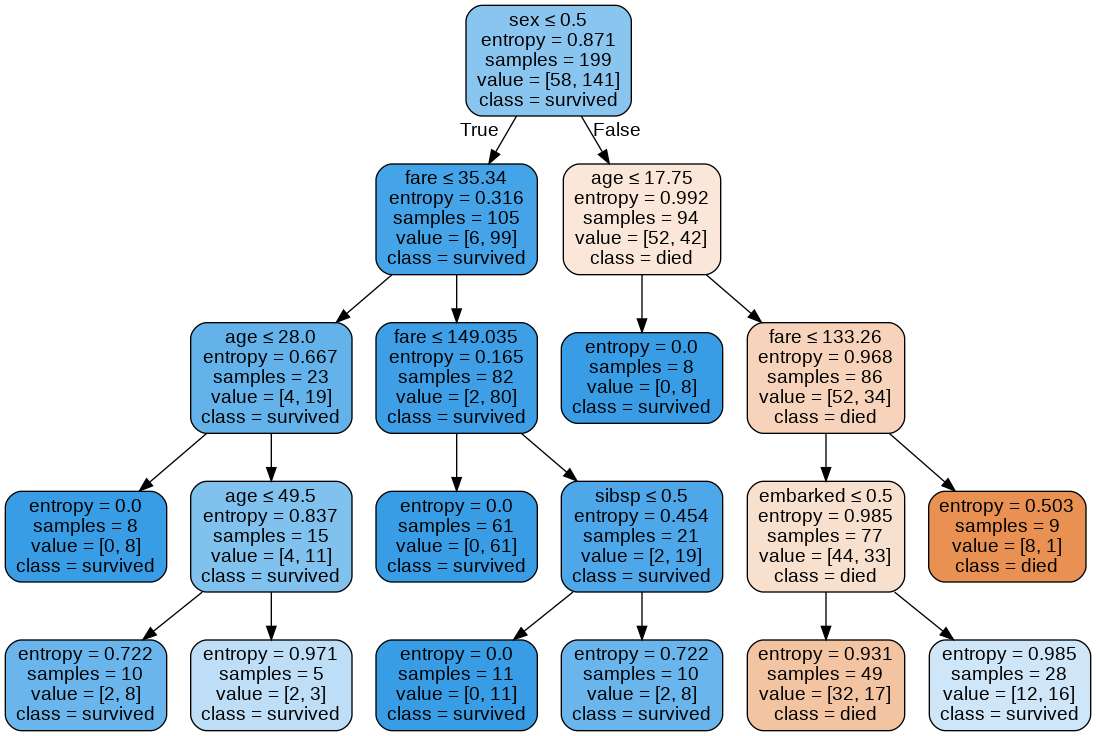

In [33]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=list(train_df.drop(['survived'],axis=1)),class_names=['died','survived'],rounded=True,filled=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(),width=500,height=300)
#graph.write_png("./bbb.png")

In [41]:
features=list(X_test.columns)
importances=dtree.feature_importances_
indices=np.argsort(importances)[::-1]
num_features=len(importances)

print(features)
print(importances)


['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
[0.         0.61462325 0.17355989 0.03029644 0.         0.14684763
 0.03467279]


In [42]:
print(np.argsort(importances))
print(indices)

[0 4 3 6 5 2 1]
[1 2 5 6 3 4 0]


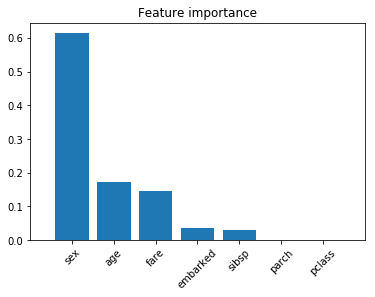

In [53]:
plt.figure()
plt.title("Feature importance")
plt.bar(range(num_features),importances[indices])
plt.xticks(range(num_features),[features[i] for i in indices],rotation='45')
plt.xlim([-1,num_features])
plt.show()

In [54]:
for i in indices:
    print("{0}---{1:.3}".format(features[i],importances[i]))

sex---0.615
age---0.174
fare---0.147
embarked---0.0347
sibsp---0.0303
parch---0.0
pclass---0.0


**9.**

Random Forest



In [0]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=args.n_estimators,criterion="entropy",max_depth=args.max_depth,min_samples_leaf=args.min_samples_leaf)
forest.fit(X_train,y_train)
pred_train=forest.predict(X_train)
pred_test=forest.predict(X_test)

In [58]:
train_acc=accuracy_score(y_train,pred_train)
test_acc=accuracy_score(y_test,pred_test)
print("train acc:{0},test acc:{1}".format(train_acc,test_acc))



train acc:0.8492462311557789,test acc:0.6901408450704225


**10.**

网格搜索

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

将模型的每个参数设定为各自的数列，然后将模型及参数集放入网格搜索的模型中，得到最佳的参数组合

In [59]:
from sklearn.model_selection import GridSearchCV
param_grid={'bootstrap':[True],'max_depth':[10,20,50],'max_features':[len(features)],'min_samples_leaf':[3,4,5],'min_samples_split':[4,8],'n_estimators':[5,10,50]}
forest=RandomForestClassifier()
grid_research=GridSearchCV(estimator=forest,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)
grid_research.fit(X_train,y_train)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   11.3s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [61]:
grid_research.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 5}

In [0]:
best_forest=grid_research.best_estimator_
best_forest.fit(X_train,y_train)
pred_train=best_forest.predict(X_train)
pred_test=best_forest.predict(X_test)